### 📌 Setup

In [1]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath(os.path.join('..')))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from src.data_processor import DataAnalyzer  

from src.utils import load_stock_data, save_processed_data

%matplotlib inline
sns.set(style="whitegrid")

### Load News Dataset

In [3]:
file_path = '../data/raw/raw_analyst_ratings.csv'
analyzer = DataAnalyzer(file_path)
df = analyzer.get_dataframe()
df.tail(20)


[Warning] Dropping 1351341 rows with invalid dates.
PRINTIG: NUM OF INVALD 1351341


,Unnamed: 0,headline,url,publisher,date,stock
1406306,1412827,40 Stocks Moving in Friday's Pre-Market Session,https://www.benzinga.com/news/20/06/16188037/4...,Lisa Levin,2020-06-05 11:24:15+00:00,ZUMZ
1406307,1412828,A Peek Into The Markets: US Stock Futures Surg...,https://www.benzinga.com/news/earnings/20/06/1...,Lisa Levin,2020-06-05 09:52:56+00:00,ZUMZ
1406308,1412829,"6 Stocks To Watch For June 5, 2020",https://www.benzinga.com/news/earnings/20/06/1...,Lisa Levin,2020-06-05 08:45:16+00:00,ZUMZ
1406309,1412830,"Zumiez Says 69% Of Stores Open As Of May 30, S...",https://www.benzinga.com/news/20/06/16184259/z...,Benzinga Newsdesk,2020-06-04 20:10:37+00:00,ZUMZ
1406310,1412831,Zumiez Will Not Give Q2 Guidance,https://www.benzinga.com/news/20/06/16184225/z...,Benzinga Newsdesk,2020-06-04 20:08:51+00:00,ZUMZ
1406311,1412832,"Zumiez Q1 EPS $(0.84) Misses $(0.43) Estimate,...",https://www.benzinga.com/news/earnings/20/06/1...,Benzinga Newsdesk,2020-06-04 20:07:40+00:00,ZUMZ
1406312,1412833,"Earnings Scheduled For June 4, 2020",https://www.benzinga.com/news/earnings/20/06/1...,Lisa Levin,2020-06-04 08:47:06+00:00,ZUMZ
1406313,1412834,Shares of several apparel companies are tradin...,https://www.benzinga.com/wiim/20/05/16120199/s...,Benzinga Newsdesk,2020-05-27 17:00:58+00:00,ZUMZ
1406314,1412835,Shares of several retail and consumer discreti...,https://www.benzinga.com/wiim/20/05/16085776/s...,Benzinga Newsdesk,2020-05-21 14:24:22+00:00,ZUMZ
1406315,1412836,Shares of several retail and apparel companies...,https://www.benzinga.com/wiim/20/04/15788956/s...,Benzinga Newsdesk,2020-04-13 14:01:37+00:00,ZUMZ


### Descriptive Stats


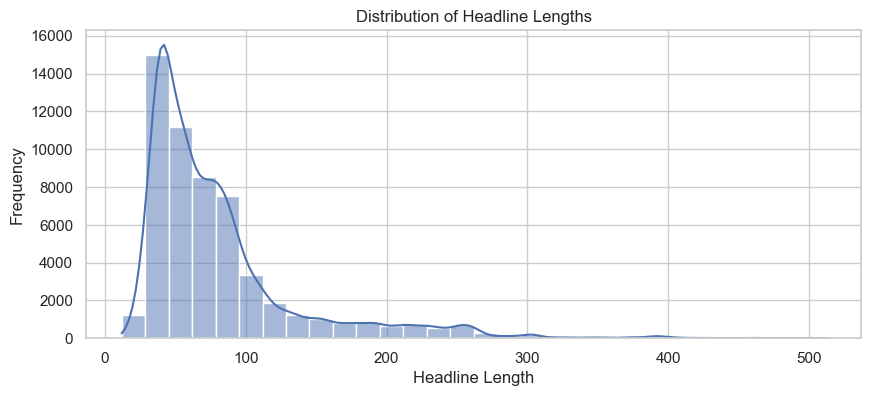

C:\Users\Lidya\AppData\Local\Temp\ipykernel_33788\124153918.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='muted')


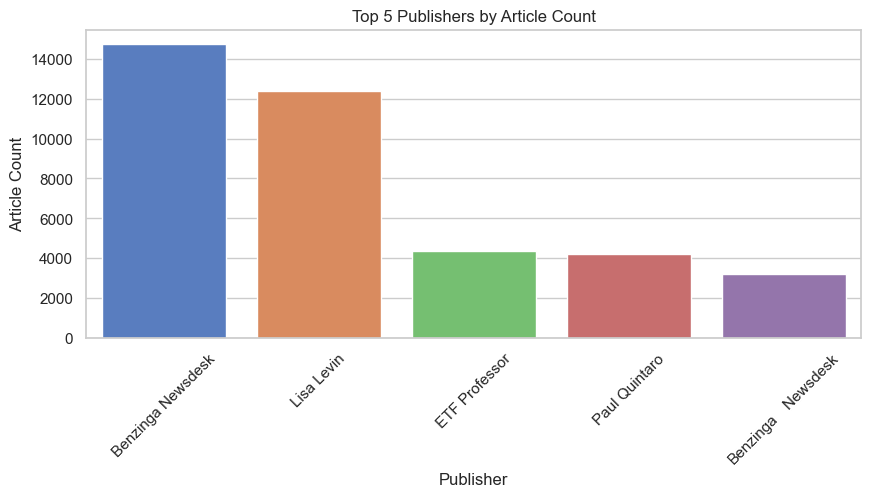

In [4]:
stats = analyzer.get_descriptive_stats()

# Headline Length
df['headline_length'] = df['headline'].apply(len)
plt.figure(figsize=(10, 4))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

# Top Publishers
top_publishers = stats['publisher_counts']
plt.figure(figsize=(10, 4))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='muted')
plt.title("Top 5 Publishers by Article Count")
plt.ylabel("Article Count")
plt.xlabel("Publisher")
plt.xticks(rotation=45)
plt.show()

### Time Analysis


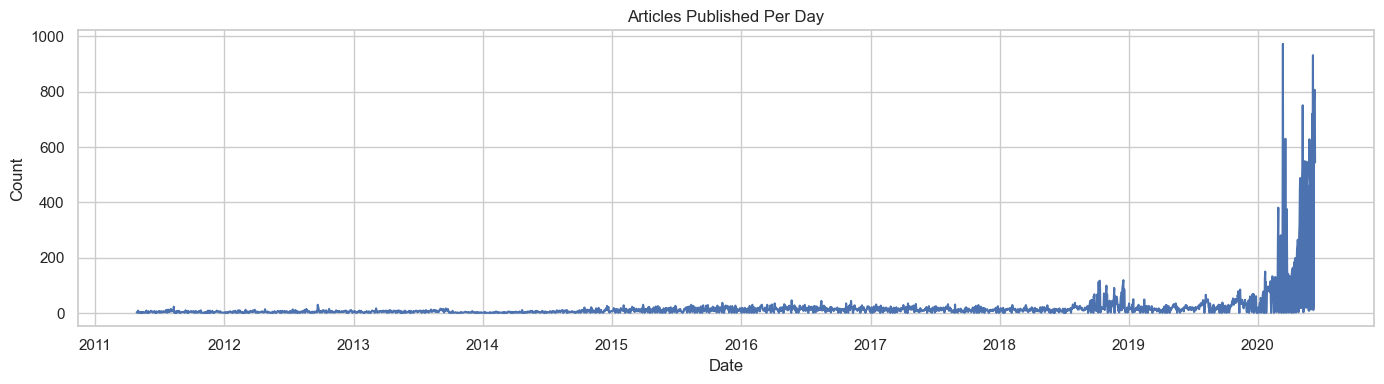

In [5]:
# Articles per day
df['date_only'] = df['date'].dt.date
daily_counts = df['date_only'].value_counts().sort_index()

plt.figure(figsize=(14, 4))
daily_counts.plot()
plt.title("Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Sentiment Analysis


C:\Users\Lidya\AppData\Local\Temp\ipykernel_33788\1347380199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


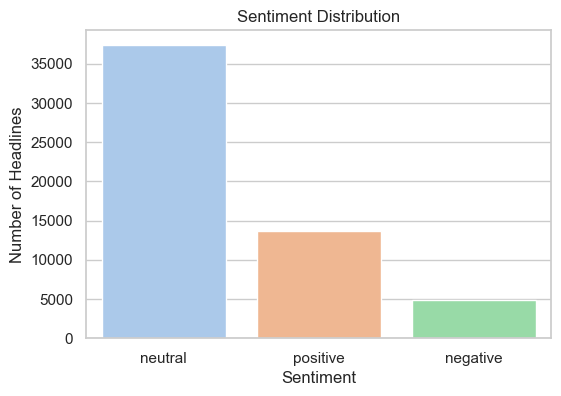

In [6]:
sentiment_counts = analyzer.get_sentiment()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title("Sentiment Distribution")
plt.ylabel("Number of Headlines")
plt.xlabel("Sentiment")
plt.show()

### Top Keywords


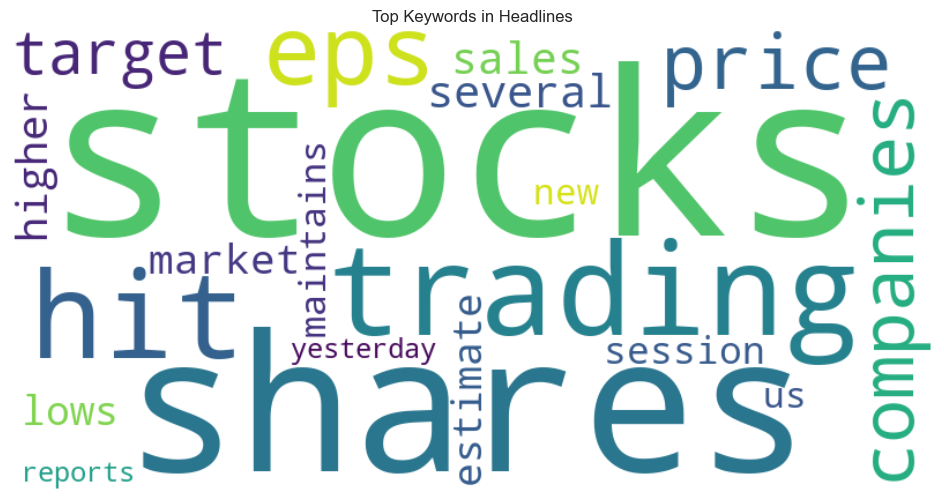

In [7]:
keywords = analyzer.get_keywords(top_n=20)
word_freq = dict(keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Keywords in Headlines")
plt.show()